In [4]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Import Libraries

In [5]:
import matplotlib.pylab as plt
plt.style.use('ggplot')
import re
import seaborn as sns

# Reading data


In [6]:
data = pd.read_csv("netflix_titles.csv")
data2 = data.copy()

# Data Analysis Tasks

In [4]:
#1. Does Netflix has more focus on TV Shows than movies in recent years?
#2. Extract the top 10 directors by number of movies made from the dataset.
#3. How many unique countries have produced movies?
#4. In what year were the least movies produced?
#5. What is the tv show with maximum duration/seasons?
#6. How many movies were produced in the last 10 years? 
#7. Which countries produced the most movies?
#8. What is the most popular rating in TV shows?
#9. In which year were the most Adult rated movies produced?
#10. Who is the most popular movie director from India?
#11. Which movie is the smallest movie ever made?
#12. Did 2020 see any new TV shows being released? True/False?
#13. How many categories of ratings exist?
#14. Does United States make more movies or tv shows?
#15. Does United States make lengthier movies than India?
#16. Was there a tv/show that was released on Feb 29 of any year?
#17. Which directors produced atleast one movie in 2021?
#18. How many unique TV shows and movies are there in the dataset? 
#19. How many TV shows and movies are there per country? 
#20. What is the average duration of a movie in the dataset?
#21. How many movies and TV shows were added to Netflix each year?
#22. What is the most common rating for movies and TV shows in the dataset?
#23. What is the average duration of movies released each year?
#24. How many movies and TV shows are there for each rating category?
#25. Which country has produced the most number of movies?
#26. Which country has produced the most number of TV shows?
#27. What is the earliest and latest release year in the dataset?
#28. How many movies and TV shows were added to Netflix each month?
#29. What is the most common duration for movies in the dataset?
#30. What is the most common number of seasons for TV shows in the dataset?
#31. How many unique directors are there in the dataset?
#32. What is the most common release year for movies and TV shows in the dataset? 
#33. How many movies and TV shows were produced by each country per year?
#34 How many movies and TV shows does each rating category have per year?
#35. How many movies and TV shows were directed by each director per year?

In [8]:
data2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [10]:
data2.shape

(6234, 12)

# Cleaning up the data

In [11]:
data2['listed_in'].value_counts()

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
                                                   ... 
TV Comedies, TV Dramas, TV Mysteries                  1
Classic Movies, Dramas, LGBTQ Movies                  1
Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy        1
Docuseries, Reality TV, Teen TV Shows                 1
Reality TV, Spanish-Language TV Shows                 1
Name: listed_in, Length: 461, dtype: int64

In [12]:
#funtion to get listed_in column into different columns for each categories
def func(str_val):
    list_val = str_val.split(",")
    output_dict = {}
    for item in list_val:
        output_dict[item] = 1
    return output_dict
    
data_categories = data2['listed_in'].apply(lambda x: func(x)).apply(pd.Series).fillna(0)

In [13]:
#concatinating both the data side by side
data2 = pd.concat([data, data_categories], axis=1)

In [14]:
data2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Sci-Fi & Fantasy,Children & Family Movies,Classic Movies,TV Shows,Spanish-Language TV Shows,Sports Movies,Classic & Cult TV,Romantic Movies,TV Sci-Fi & Fantasy,Classic & Cult TV
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Does Netflix has more focus on TV Shows than movies in recent years?

In [8]:
data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

<Axes: title={'center': 'Type of shows on netflix'}, xlabel='type'>

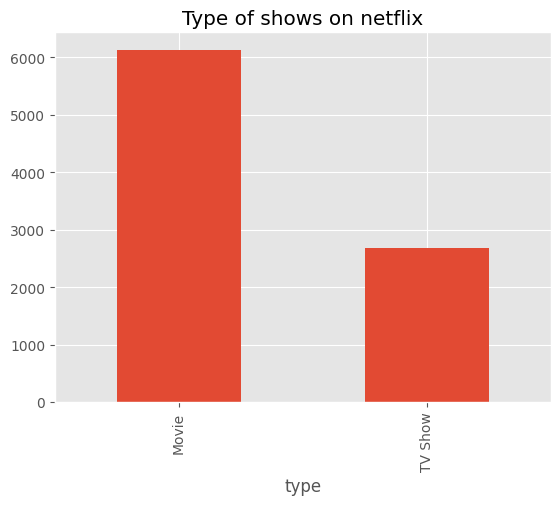

In [9]:
data['type'].value_counts().plot(kind='bar',title= 'Type of shows on netflix')

The insight from the above analysis is that we have more Movies than TV shows.

# 2. Extract the top 10 directors by number of movies made from the dataset.

In [16]:
data.loc[data['type'] == 'Movie', 'director'].value_counts().reset_index().head(10)

,index,director
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,14
2,Jay Karas,13
3,Jay Chapman,12
4,Steven Spielberg,9
5,Martin Scorsese,9
6,Johnnie To,8
7,David Dhawan,8
8,Lance Bangs,8
9,S.S. Rajamouli,7


# 3. How many unique countries have produced movies?

In [11]:
data.loc[data['type'] == 'Movie','country'].nunique()

651

As per the current data 651 unique countries have produced moview but this data needs a cleanup, you can see why below.

In [12]:
data['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

# 4. In what year were the least movies produced?

In [13]:
data.loc[data['type'] == 'Movie','release_year'].value_counts()

release_year
2017    767
2018    767
2016    658
2019    633
2020    517
       ... 
1966      1
1961      1
1946      1
1963      1
1947      1
Name: count, Length: 73, dtype: int64

From the above analysis we found out that minimum number of movies were produced in the years of 1966,1961,1946,1963, 1947 and possibly more.

# 5. What is the tv show with maximum duration/seasons?

In [14]:
data.loc[data['type'] == 'TV Show', ['duration']].value_counts().reset_index()

,duration,count
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,4 Seasons,95
4,5 Seasons,65
5,6 Seasons,33
6,7 Seasons,23
7,8 Seasons,17
8,9 Seasons,9
9,10 Seasons,7


In [15]:
data.loc[data['duration'] == '17 Seasons', :]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...


From the above analysis we found out that Grey's Anatomy has the maximum seasons released among all the TV shows available on netflix.

# 6. How many movies were produced in the last 10 years?

In [16]:
data.loc[(data['type'] == 'Movie') & (data['release_year'] > 2013)].shape[0]

4281

From the above code we can conclude that 4281 Movies were produced in the last 10 years.

# 7. Which countries produced the most movies?


In [17]:
data.loc[data['type'] == 'Movie','country'].value_counts()

country
United States                            2058
India                                     893
United Kingdom                            206
Canada                                    122
Spain                                      97
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: count, Length: 651, dtype: int64

From the above analysis we can see that United states has produced the maximum number of movies.

# 8. What is the most popular rating in TV shows?

In [18]:
data.loc[data['type'] == 'TV Show', 'rating'].value_counts().reset_index

<bound method Series.reset_index of rating
TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: count, dtype: int64>

from the above analysis we can see the most popular rating is TV-MA.

 # 9. In which year were the most Adult rated movies produced?

In [19]:
movie_rating = data.loc[(data['type'] == 'Movie') & (data['rating'] == 'TV-MA')]

movie_rating.loc[: ,'release_year'].value_counts()

release_year
2018    358
2017    337
2019    286
2016    273
2020    220
2015    135
2021    110
2014     62
2013     48
2012     41
2010     33
2008     20
2011     20
2006     13
2007     12
2003      8
2004      8
2009      8
1998      7
1991      5
2002      5
2005      4
1999      4
1983      4
1993      3
1990      3
1997      3
1992      3
1978      2
1975      2
2001      2
1982      2
1989      2
1979      2
1985      2
1963      1
1981      1
1984      1
1945      1
1973      1
1976      1
1986      1
1988      1
1970      1
1994      1
1977      1
2000      1
1972      1
1987      1
1967      1
Name: count, dtype: int64

from the above analysis we can find out that in the year 2018 is the year of most movie produced. 

# 10. Who is the most popular movie director from India?

In [20]:
pop_dir = data.loc[(data['country'] == 'India') & (data['type'] == 'Movie')]

In [21]:
pop_dir.loc[: , 'director'].value_counts()

director
David Dhawan          9
Ram Gopal Varma       7
Anees Bazmee          6
Sooraj R. Barjatya    6
Rajkumar Santoshi     6
                     ..
Manu Ashokan          1
Saurabh Sinha         1
Sunil Thakur          1
Rai Yuvraj Bains      1
Mozez Singh           1
Name: count, Length: 637, dtype: int64

David dhawan from India is the most popular director for movies.

# 11. Which movie is the smallest movie ever made?

In [22]:
data.loc[(data['type'] == 'Movie') & (data['duration'] == '8 min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,"December 28, 2020",2020,PG-13,8 min,Dramas,Animation and activism unite in this multimedi...


from the above analysis we can see most probably the smallest movie in this data is Cops and Robbers.

# 12. Did 2020 see any new TV shows being released? True/False?

In [23]:
release_2020 = data.loc[(data['type'] == 'TV Show') & (data['release_year'] == 2020)]

In [24]:
release_2020['type'].value_counts()

type
TV Show    436
Name: count, dtype: int64

436 TV show were added in the year 2020 from the above data.

# 13. How many categories of ratings exist?

In [25]:
data.loc[:, 'rating'].nunique()

17

there are 17 types of ratings among TV show and Movies together exist on Netflix.

# 14. Does United States make more movies or tv shows?

In [26]:
data.loc[(data['country'] == 'United States') & (data['type'] == 'TV Show'), 'title'].nunique()

760

In [27]:
data.loc[(data['country'] == 'United States') & (data['type'] == 'Movie'), 'title'].nunique()

2058

In [28]:
# alternate approach
data.loc[(data['country'] == 'United States'), 'type'].value_counts()

type
Movie      2058
TV Show     760
Name: count, dtype: int64

if my above analysis is correct US makes more movies than TV shows. 

# 15. Does United States make lengthier movies than India?

In [29]:
data['duration_int'] = data['duration'].str.extract(r'(\d+)') 
data['duration_int'] = data['duration_int'].fillna(0).astype(int)
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


In [30]:
data_movies = data[['type', 'country', 'duration_int']].query("type == 'Movie' and country in ('United States', 'India')")
data_movies.head()

,type,country,duration_int
0,Movie,United States,90
9,Movie,United States,104
24,Movie,India,166
27,Movie,United States,103
28,Movie,United States,97


In [31]:
data_movies.groupby('country')['duration_int'].mean()

country
India            126.922732
United States     90.497570
Name: duration_int, dtype: float64

from the above analysis we can say that India makes lenthier movies than Unites States make.

# 16. Was there a tv/show that was released on Feb 29 of any year?

In [32]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
duration_int     int64
dtype: object

In [33]:
data.loc[data['date_added'].fillna("na").str.contains("February 29"),:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int


From the above analysis we can say that we dont have any TV show added on 29th Feb.

# 17. Which directors produced atleast one movie in 2021?

In [34]:
release_year = data.loc[(data['type'] == 'Movie') & (data['release_year'] == 2021)]

In [35]:
pd.DataFrame(release_year.loc[:, 'director']).value_counts()

director           
Rathindran R Prasad    4
Leigh Janiak           3
Troy Miller            2
Ben Simms              2
Keishi Otomo           2
                      ..
Hemambar Jasti         1
Ivan Ayr               1
J Blakeson             1
Jakub Piątek           1
Zhao Ji                1
Name: count, Length: 241, dtype: int64

above is the list of directors who have produced movies in 2021.

# 18. How many unique TV shows and movies are there in the dataset?

In [36]:
data.groupby('type').nunique().loc[:, 'title']

type
Movie      6131
TV Show    2676
Name: title, dtype: int64

There are 6131 movies and 2676 TV shows in the dataset.

# 19. How many TV shows and movies are there per country? 

In [37]:
data.groupby(['country', 'type']).nunique().loc[:, 'title']


country                                              type   
, France, Algeria                                    Movie       1
, South Korea                                        TV Show     1
Argentina                                            Movie      38
                                                     TV Show    18
Argentina, Brazil, France, Poland, Germany, Denmark  Movie       1
                                                                ..
Venezuela                                            Movie       1
Venezuela, Colombia                                  Movie       1
Vietnam                                              Movie       7
West Germany                                         Movie       1
Zimbabwe                                             Movie       1
Name: title, Length: 847, dtype: int64

# 20. What is the average duration of a movie in the dataset?

In [38]:
data['duration_int'] = data['duration'].str.extract(r'(\d+)')
data['duration_int'] = data['duration_int'].fillna(0).astype(int)
data.loc[data['type'] == 'Movie','duration_int'].mean()                             

99.52846191485891

from the above analysis the average duration of movie in the dataset is 99.528 min.

# 21. How many movies and TV shows were added to Netflix each year?

In [39]:
data.groupby(['type', 'release_year']).nunique().loc[:, 'title'].reset_index()

,type,release_year,title
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


# 22. What is the most common rating for movies and TV shows in the dataset?

In [28]:
data_agg = data.groupby(['type', 'rating'])['title'].nunique().reset_index()
data_agg.query("type == 'Movie'").nlargest(n=10, columns='title')

,type,rating,title
8,Movie,TV-MA,1342
6,Movie,TV-14,1037
5,Movie,R,505
9,Movie,TV-PG,432
4,Movie,PG-13,286
2,Movie,NR,202
3,Movie,PG,183
7,Movie,TV-G,80
11,Movie,TV-Y7,69
10,Movie,TV-Y,41


In [41]:
data_agg.query("type == 'TV Show'").nlargest(n=1, columns='title')

,type,rating,title
21,TV Show,TV-MA,1145


TV-MA seems to be the most common rating across Movies and TV shows. 

# 23. What is the average duration of movies released each year?

In [42]:
data['duration_int'] = data['duration'].str.extract(r'(\d+)') 
data['duration_int'] = data['duration_int'].fillna(0).astype(int)
movie_yearwise = data.loc[(data['type'] == 'Movie')]
movie_yearwise = movie_yearwise.groupby(['release_year'])['duration_int'].mean().reset_index()
movie_yearwise
#movie_yearwise.groupby('duration_int')['release_year'].mean().reset_index()

,release_year,duration_int
0,1942,35.000000
1,1943,62.666667
2,1944,52.000000
3,1945,51.333333
4,1946,58.000000
...,...,...
68,2017,95.410691
69,2018,96.185137
70,2019,93.466035
71,2020,92.141199


# 24. How many movies and TV shows are there for each rating category?


In [32]:
data_grouped = data.groupby(['type', 'rating'])['rating'].value_counts().reset_index()
data_grouped

ValueError: cannot insert rating, already exists

In [31]:
pd.pivot_table(data=data_grouped, index='rating', columns='type', values='count', fill_value=0)

NameError: name 'data_grouped' is not defined

# 25. Which country has produced the most number of movies?

In [45]:
num_movie = data.loc[(data['type'] == 'Movie')]
num_movie = num_movie.groupby(['country'])['title'].count().sort_values(ascending=False)
num_movie

country
United States      2058
India               893
United Kingdom      206
Canada              122
Spain                97
                   ... 
India, Mexico         1
India, Malaysia       1
India, Japan          1
India, Iran           1
Zimbabwe              1
Name: title, Length: 651, dtype: int64

Unites stated produced the most number of movies.

# 26. Which country has produced the most number of TV shows?

In [46]:
num_tvshow = data.loc[(data['type'] == 'TV Show')]
num_tvshow = num_tvshow.groupby('country')['title'].count().sort_values(ascending=False)
num_tvshow


country
United States                                                  760
United Kingdom                                                 213
Japan                                                          169
South Korea                                                    158
India                                                           79
                                                              ... 
Italy, Canada, France                                            1
Italy, Germany                                                   1
Italy, South Africa, West Germany, Australia, United States      1
Italy, United Kingdom                                            1
Uruguay, Germany                                                 1
Name: title, Length: 196, dtype: int64

United states wins again.


# 27. What is the earliest and latest release year in the dataset?




In [47]:
data.loc[:, 'release_year'].sort_values().reset_index()

,index,release_year
0,4250,1925
1,7790,1942
2,8205,1942
3,8660,1943
4,8739,1943
...,...,...
8802,862,2021
8803,861,2021
8804,857,2021
8805,876,2021


In [48]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2


from the above data we can say the earliest release in the data is from 1925 and the latest one is from 2021.

# 28. How many movies and TV shows were added to Netflix each month?

In [49]:
data['month_added'] = pd.to_datetime(data['date_added'], format='mixed')
data['month_added'] = data['month_added'].dt.strftime('%B') #this is for data needed in string form in a new column.
#data = data.drop(['month'], axis=1) #this is to drop a column.
data.groupby(['type','month_added'])['title'].count().reset_index()

,type,month_added,title
0,Movie,April,550
1,Movie,August,519
2,Movie,December,547
3,Movie,February,382
4,Movie,January,546
5,Movie,July,565
6,Movie,June,492
7,Movie,March,529
8,Movie,May,439
9,Movie,November,498


# 29. What is the most common duration for movies in the dataset?

In [34]:
movie_ds = data.loc[(data['type'] == 'Movie')]
movie_ds = movie_ds.groupby('duration')['title'].nunique().reset_index()
movie_ds = movie_ds.rename(columns={'title': 'number_of_titles'})
movie_ds.sort_values('number_of_titles', ascending=False)

,duration,number_of_titles
176,90 min,111
177,91 min,102
178,92 min,101
181,95 min,94
180,94 min,94
...,...,...
118,312 min,1
120,33 min,1
121,34 min,1
123,36 min,1


from the above analysis we can see that 90min length is the most common for movies in this dateset.

# 30. What is the most common number of seasons for TV shows in the dataset?

In [51]:
x = data.loc[(data['type'] == 'TV Show')]
x.groupby('duration').nunique()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,month_added
duration,,,,,,,,,,,,,
1 Season,1793,1,1793,178,1476,139,811,41,8,186,1790,1,12
10 Seasons,7,1,7,0,7,4,6,5,5,7,7,1,5
11 Seasons,2,1,2,0,2,1,1,2,1,1,2,1,1
12 Seasons,2,1,2,0,2,2,2,2,2,2,2,1,2
13 Seasons,3,1,3,0,3,2,2,2,3,3,3,1,2
15 Seasons,2,1,2,1,2,2,2,2,1,2,2,1,2
17 Seasons,1,1,1,0,1,1,1,1,1,1,1,1,1
2 Seasons,425,1,425,21,384,74,321,23,7,113,425,1,12
3 Seasons,199,1,199,4,179,48,175,16,7,85,198,1,12


as we can see above 'Season 1' is the most common number of season for a TV show in this dataset.

In [52]:
data.query("title == 'Kota Factory'") #this is to check if the seasons are repeating for a perticular title.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,month_added
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,September


# 31. How many unique directors are there in the dataset?

In [53]:
data.groupby('director')['title'].nunique().count()

4528

there are total 4528 unique directors are there in the dataset. Wow!

# 32. What is the most common release year for movies and TV shows in the dataset?

In [54]:
#data.loc[(data['type'] == 'Movie'), 'release_year'].value_counts()
data_peryear = data.groupby('type')['release_year'].value_counts().reset_index()

data_peryear
data_peryear.query("type == 'Movie'").nlargest(n=1, columns='count')

,type,release_year,count
0,Movie,2017,767


In [55]:
data_peryear.query("type == 'TV Show'").nlargest(n=1, columns='count')

,type,release_year,count
73,TV Show,2020,436


as we can see from the above analysis, 2017 for movies and 2020 for TV show were the most common release for the dataset.

# 33. How many movies and TV shows were produced by each country per year?

In [56]:
data.groupby(['type', 'country'])['country'].value_counts().reset_index()

,type,country,count
0,Movie,", France, Algeria",1
1,Movie,Argentina,38
2,Movie,"Argentina, Brazil, France, Poland, Germany, De...",1
3,Movie,"Argentina, Chile",2
4,Movie,"Argentina, Chile, Peru",1
...,...,...,...
842,TV Show,"United States, South Korea, China",2
843,TV Show,"United States, Sweden",1
844,TV Show,"United States, United Kingdom",9
845,TV Show,"United States, United Kingdom, Australia",1


The data is not cleaned up hence the above data.

# 34. How many movies and TV shows does each rating category have per year?

In [57]:
data.groupby(['type', 'rating'])['release_year'].value_counts().reset_index()

,type,rating,release_year,count
0,Movie,66 min,2015,1
1,Movie,74 min,2017,1
2,Movie,84 min,2010,1
3,Movie,G,2009,4
4,Movie,G,2016,3
...,...,...,...,...
559,TV Show,TV-Y7,1981,1
560,TV Show,TV-Y7,1993,1
561,TV Show,TV-Y7,1997,1
562,TV Show,TV-Y7,1998,1


# 35. How many movies and TV shows were directed by each director per year?

In [58]:
data_peryear = data.groupby(['type', 'director','release_year'])['title'].count().reset_index()
data_peryear

,type,director,release_year,title
0,Movie,A. L. Vijay,2016,1
1,Movie,A. L. Vijay,2019,1
2,Movie,A. Raajdheep,2020,1
3,Movie,A. Salaam,1975,1
4,Movie,A.R. Murugadoss,2017,1
...,...,...,...,...
5906,TV Show,Vijay S. Bhanushali,2019,1
5907,TV Show,"Vikramaditya Motwane, Anurag Kashyap",2019,1
5908,TV Show,Wouter Bouvijn,2019,1
5909,TV Show,Yasuhiro Irie,2010,1


# Cluster Analysis

In [59]:
#Let's create new columns for Series and Movies and extract their duration to the new columm, convert them to float

data2['Movies_duration'] = data2['duration'].str.extract('(\d+) min',expand=False).astype(float)
data2['TV_Seasons'] = data2['duration'].str.extract('(\d+) Season', expand=False).astype(float)

data2.fillna(0)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Spanish-Language TV Shows,Classic & Cult TV,Music & Musicals,Romantic Movies,LGBTQ Movies,Stand-Up Comedy,TV Sci-Fi & Fantasy,Sports Movies,Movies_duration,TV_Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,s4,TV Show,Jailbirds New Orleans,0,0,0,"September 24, 2021",2021,TV-MA,1 Season,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,s5,TV Show,Kota Factory,0,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158.0,0.0
8803,s8804,TV Show,Zombie Dumb,0,0,0,"July 1, 2019",2018,TV-Y7,2 Seasons,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0


In [60]:
data2['type'] = pd.factorize(data2['type'])[0]
data2['director'] = pd.factorize(data2['director'])[0]
data2['country'] = pd.factorize(data2['country'])[0]
data2['rating'] = pd.factorize(data2['rating'])[0]

In [61]:
X_feats = np.setdiff1d(data2.columns, ['show_id','title','cast','date_added', 'listed_in','duration','description'])

In [62]:
#bringing features into dataframe
data_for_clustering = data2[X_feats]

In [63]:
data_for_clustering = data_for_clustering.fillna(0)

# Importing Umap

In [64]:
import umap

In [65]:
#squishing all the features into two columns
model = umap.UMAP(random_state=42)
train_umap_embeddings = model.fit_transform(data_for_clustering)

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [66]:
trainUmap = pd.DataFrame(train_umap_embeddings)
trainUmap.columns = ['col1', 'col2'] #renaming the columns after tranforming the data

In [67]:
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters = 8, random_state=2023, n_init="auto").fit(trainUmap[['col1','col2']])
cluster_ids = Kmeans.labels_
trainUmap['cluster_ids'] = cluster_ids

In [68]:
trainUmap['cluster_ids'].value_counts()

cluster_ids
7    1519
0    1447
1    1217
2    1093
4     996
6     931
3     861
5     743
Name: count, dtype: int64

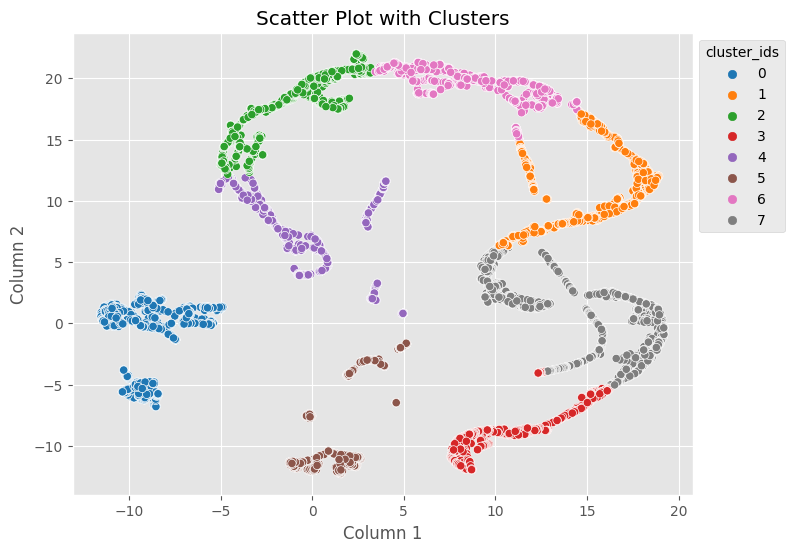

In [69]:
# Scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='col1', y='col2', hue='cluster_ids', data=trainUmap, palette='tab10')

# Add labels and title
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Scatter Plot with Clusters')

plt.legend(title='cluster_ids', loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()